In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data= pd.read_csv("Social_Network_Ads.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data= data.drop(columns= ["User ID"])

In [6]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

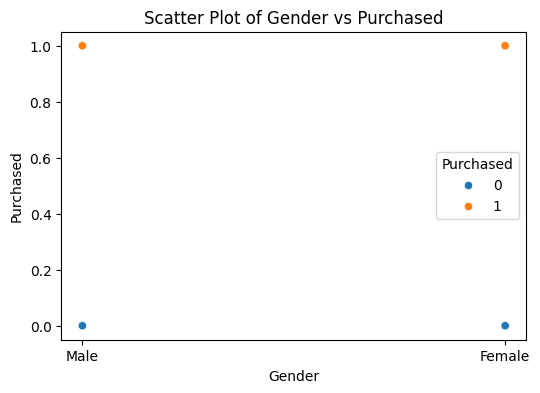

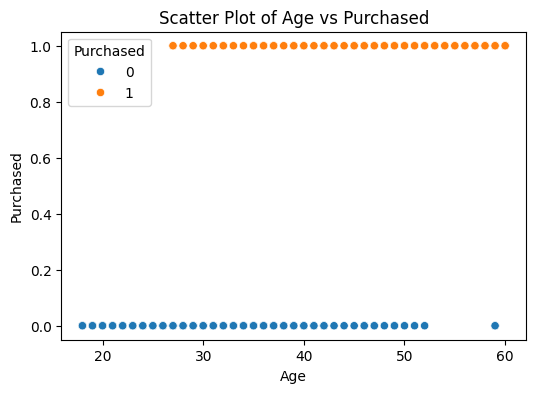

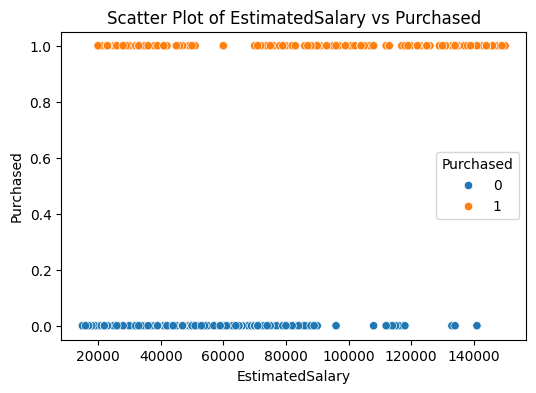

In [7]:
independent_columns = ['Gender', 'Age', 'EstimatedSalary']

for column in independent_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=column, y='Purchased', data=data, hue='Purchased')
    plt.title(f'Scatter Plot of {column} vs Purchased')
    plt.show()


In [24]:
# purchased based on age(single input features)

In [8]:
x= data[["Age"]]
y= data["Purchased"]

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [14]:
lr.score(x_test, y_test)*100

91.25

In [15]:
lr.predict([[56]])

C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

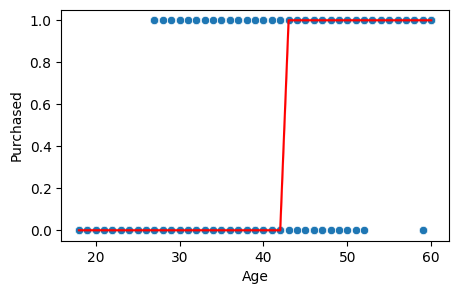

In [16]:
plt.figure(figsize= (5, 3))
sns.scatterplot(x= "Age", y= "Purchased", data= data)
sns.lineplot(x= "Age", y= lr.predict(x), data = data, color="red")
plt.show()

In [26]:
# purchased based on multiple inputs

Gender: Categorical feature (needs to be encoded).
Age: Numeric feature.
EstimatedSalary: Numeric feature.
Purchased: Target variable (0 or 1 for binary classification).

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
le= LabelEncoder()
data["Gender"]= le.fit_transform(data["Gender"])

In [10]:
x = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [11]:
matrix= data.corr()
target= matrix['Purchased']
print(target)

Gender            -0.042469
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64


In [12]:
# age is best feature for this model

In [13]:
sc= StandardScaler()
x[["Age", "EstimatedSalary"]]= sc.fit_transform(x[["Age", "EstimatedSalary"]])

C:\Users\asus\AppData\Local\Temp\ipykernel_9072\1069645794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[["Age", "EstimatedSalary"]]= sc.fit_transform(x[["Age", "EstimatedSalary"]])


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42 )

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [19]:
lr.score(x_test, y_test)*100

88.75

Purchased=Intercept+(Coefficient for Gender×Gender)+(Coefficient for Age×Age)+(Coefficient for EstimatedSalary×EstimatedSalary)

In [20]:
lr.coef_

array([[0.25510968, 2.03600347, 1.1322105 ]])

Age is likely the best predictor because its coefficient is the largest, meaning it has the strongest relationship with the outcome.
However, it’s also important to consider the data scaling and whether any features have been standardized, as that could affect the coefficient magnitudes.

In [21]:
lr.intercept_

array([-1.1902827])

In [22]:
y_pred = lr.predict(x)

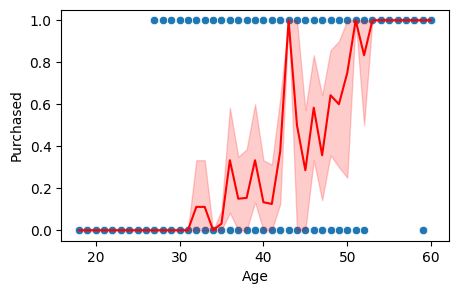

In [23]:
plt.figure(figsize= (5, 3))
sns.scatterplot(x= "Age", y= "Purchased", data= data)
sns.lineplot(x= "Age", y= y_pred, data = data, color="red")
plt.show()

In [69]:
# The red line for predictions has some variation, which suggests the model is capturing some relationship between Age and Purchased.
# However, the shape of the line (non-smooth fluctuations) might indicate overfitting or noise in the predictions.


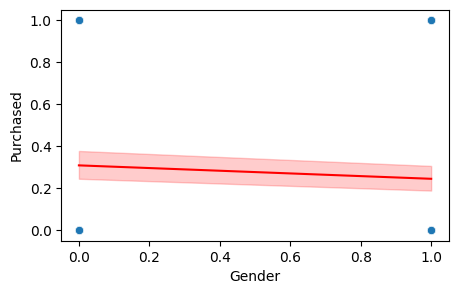

In [28]:
plt.figure(figsize= (5, 3))
sns.scatterplot(x= "Gender", y= "Purchased", data= data)
sns.lineplot(x= "Gender", y= y_pred, data = data, color="red")
plt.show()

In [71]:
# The red line for Gender is almost flat, which implies that Gender might not be a strong predictor for Purchased in your dataset.

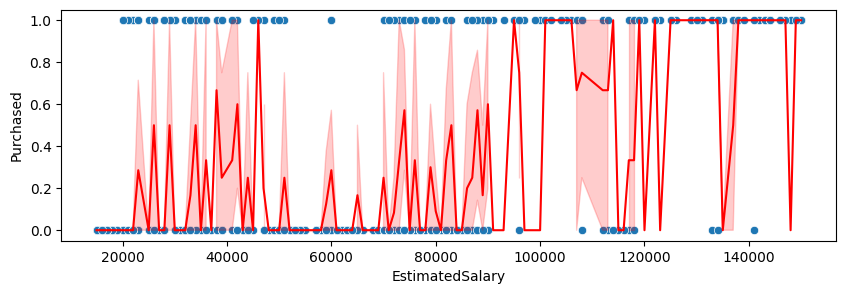

In [29]:
plt.figure(figsize= (10, 3))
sns.scatterplot(x= "EstimatedSalary", y= "Purchased", data= data)
sns.lineplot(x= "EstimatedSalary", y= y_pred, data = data, color="red")
plt.show()

In [72]:
# The prediction line for EstimatedSalary is highly fluctuating, which seems unrealistic.
# This could be due to:
# Lack of feature scaling (standardizing numerical data like EstimatedSalary).
# A small dataset causing instability in predictions.